# **Exploratory Data Analysis on Wine Dataset**

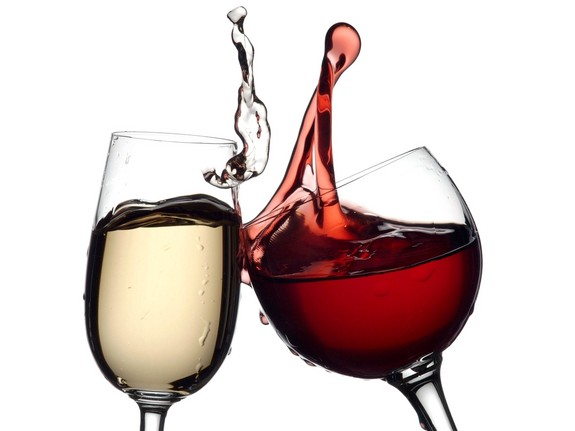

## Dataset Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

##### Attribute Information:
Input variables (based on physicochemical tests): \
1 - fixed acidity \
2 - volatile acidity \
3 - citric acid \
4 - residual sugar \
5 - chlorides \
6 - free sulfur dioxide \
7 - total sulfur dioxide \
8 - density \
9 - pH \
10 - sulphates \
11 - alcohol \
Output variable (based on sensory data): \
12 - quality (score between 0 and 10) \


## **Import modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [2]:
df = pd.read_csv('/content/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **Statistical Analysis**

In [3]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**The Input attributes are in numerical forms.**

****We have to predict the output variable "quality". ****
**We will fill the missing values using the mean values.**

In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Only one input attribute is an object and the others are in float.

Output attribute is integer datatype. We can read the attribute as a classifier or regressor because it is in a particular range.**

## **Data Preprocesssing**

### **Checking Null Values**

In [5]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### **Handle Missing Values**

In [6]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> Since attribute 'type' is an object datatype. We have to ignore it using the if condition.

**We use mean() to fill the mean values of that particular attribute.**

**To fill more missing values, you can also use advanced filling techniques (For example deriving values using features of other attributes).**

## **Exploratory Data Analysis (EDA)**

### **Checking for Outliers**

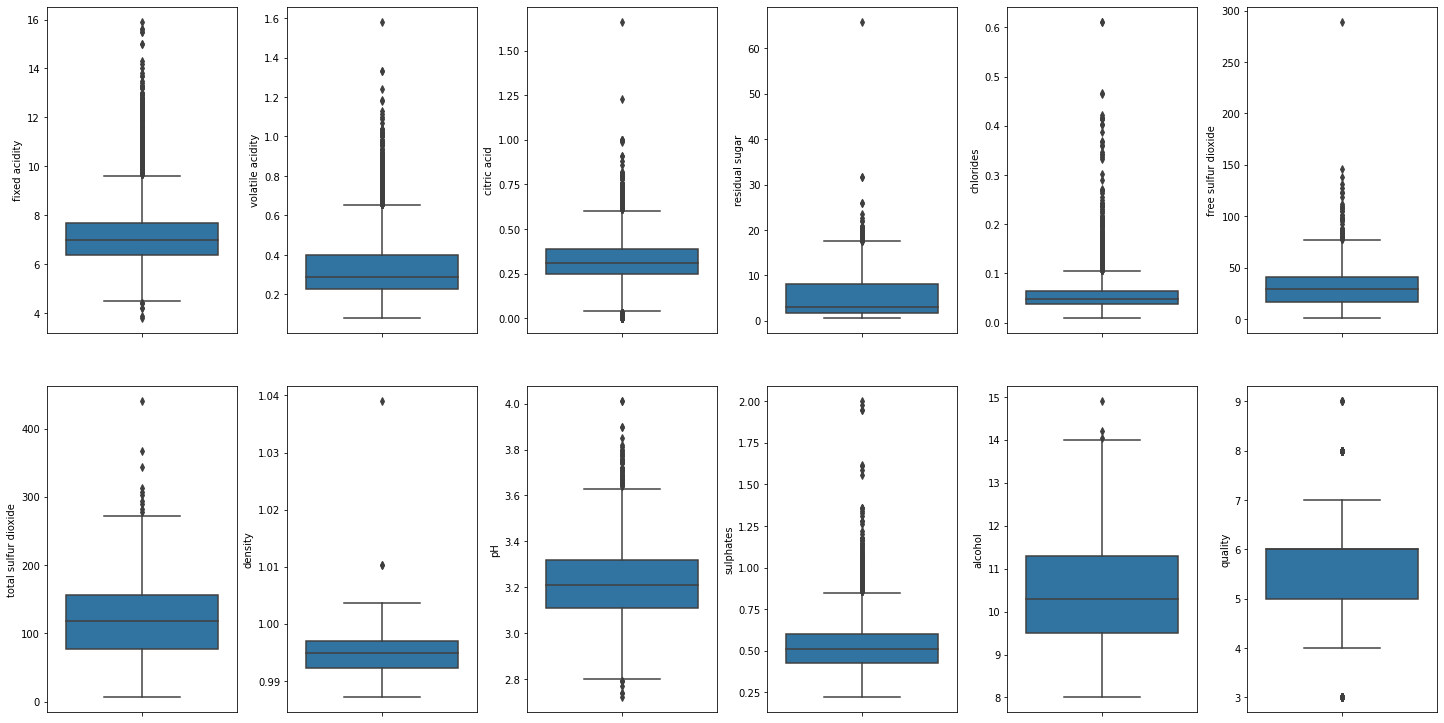

In [8]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**We observe outliers from a few attributes.** 
**Since it won't affect the outcome of the project, we will ignore this outlier.**

### **Correlation between Attributes**

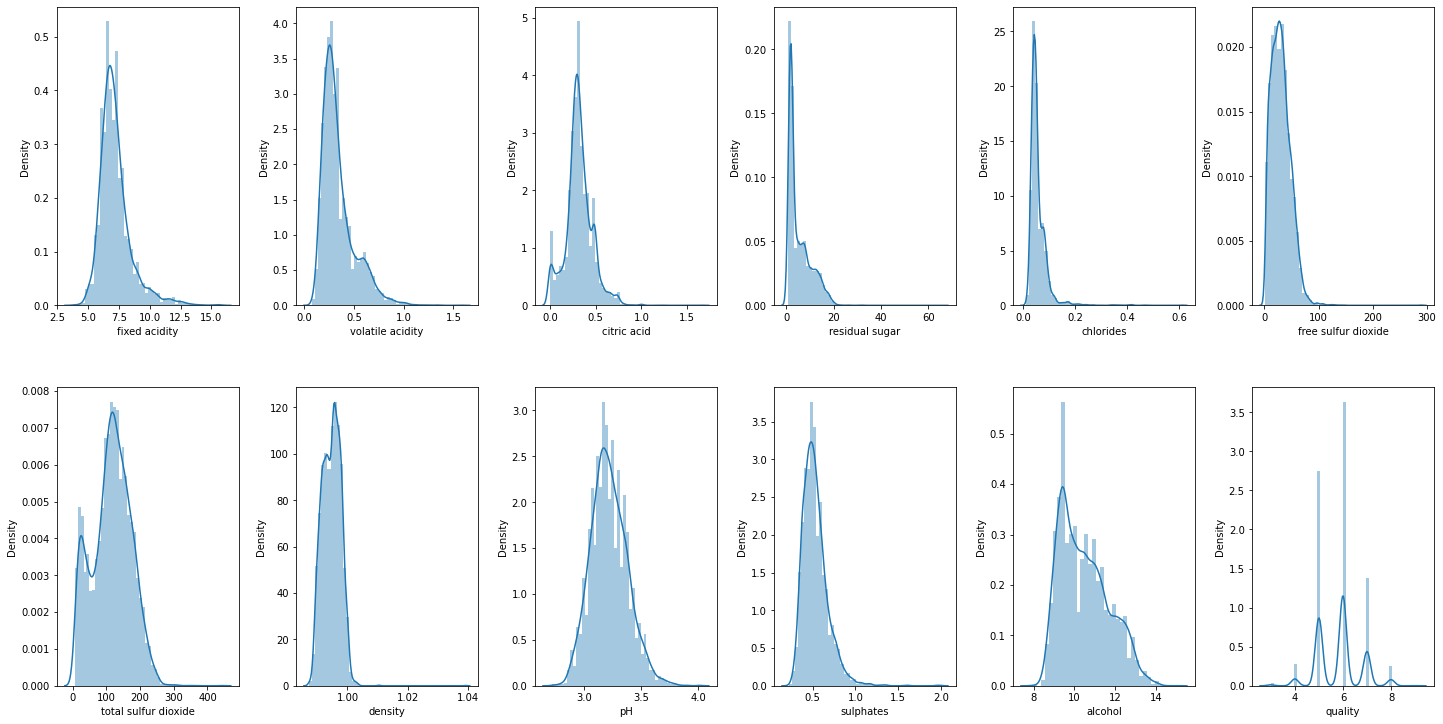

In [9]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**We observe graphs of good range. However, we can improve a few attributes by removing outliers from that particular attributes.**

**The column 'Free sulfur dioxide' is slightly right-skewed. Thus we need to normalize it using log transformation**

In [10]:
# log transformation Log transformation helps to make the highly skewed distribution to less skewed.
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

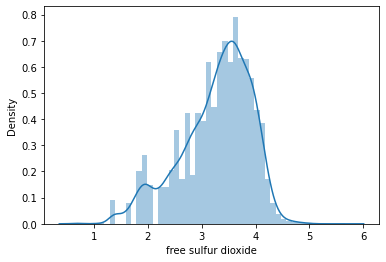

In [11]:
sns.distplot(df['free sulfur dioxide'])

**We can observe a Normal distribution in a form of a bell curve.**

### **Finding the categories of Wine**

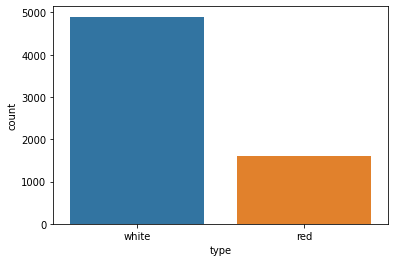

In [12]:
sns.countplot(df['type'])

**Most datasets belong to the white wines category.**

### **Checking the Qualities of wine**

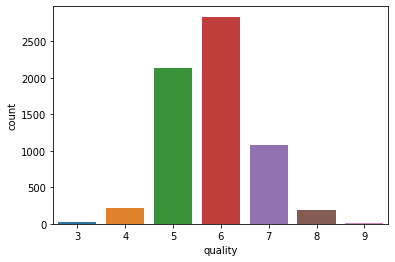

In [13]:
sns.countplot(df['quality'])

**Although the quality ranges from 0 to 10. However, for this dataset, it is in the range of 3 to 9.**

**The middle classes have higher counts. Therefore the entire model will be biased toward these three classes.**

**Since the data are imbalanced through the classes, we may need to perform class-balancing after splitting the data.**



###  **Coorelation Matrix**



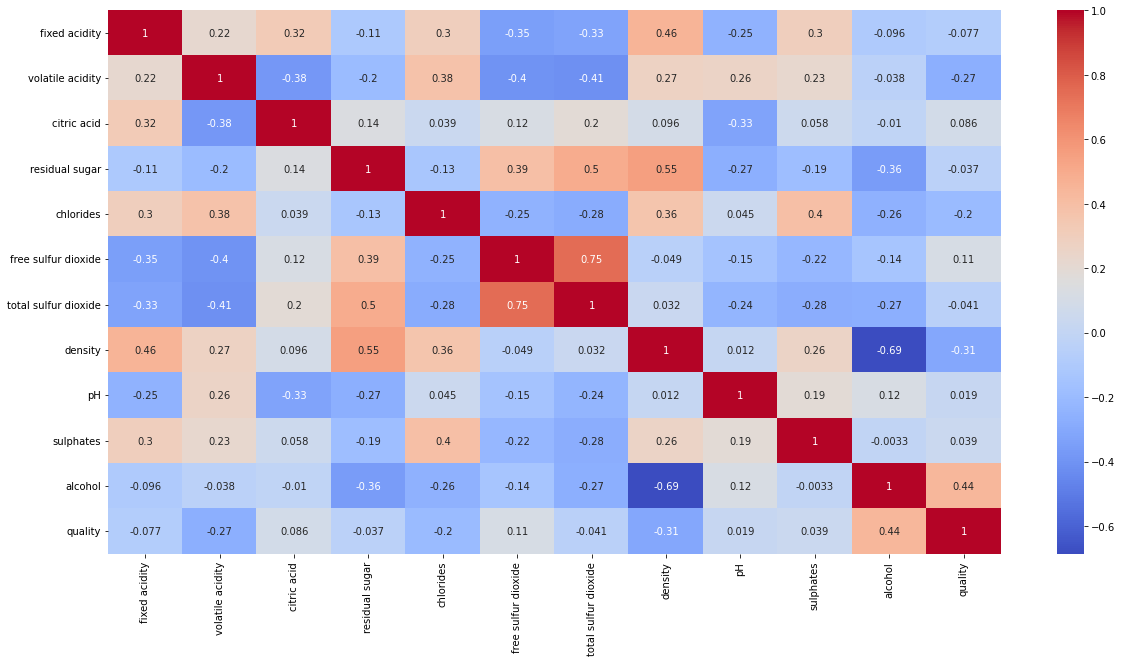

In [14]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
# If two variables have a high correlation, we can neglect one variable from those two.

**The output attribute 'quality' shows a positive correlation with 'alcohol'.**

**Additionally, we observe a positive correlation between 'free sulfur dioxide' and 'total sulfur dioxide'.**

**We can drop the attribute 'density' and 'free sulfur dioxide' to remove some features.**



## Input Split

In [15]:
X = df.drop(columns=['type', 'quality'])
y = df['quality']

## Class Imbalancement

**We use smote to balance the class ratio.**

In [16]:
y.value_counts() #because quality was imbalanced

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

**It shows the count of data values for each class.**

**The oversample function generates new features from minority classes.**

In [17]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [18]:
y.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

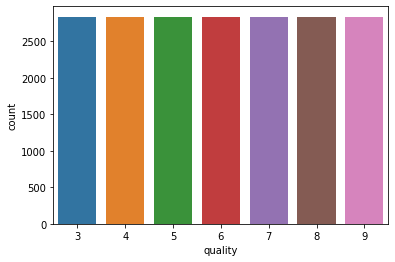

In [19]:
sns.countplot (y)

In [20]:
y.describe()

count    19852.00000
mean         6.00000
std          2.00005
min          3.00000
25%          4.00000
50%          6.00000
75%          8.00000
max          9.00000
Name: quality, dtype: float64

Now all the classes have oversampled to the upper value.

Further, we can get a uniform dataset.

To use this dataset for multi-classification, we can specify percentages in a dictionary. Afterwards, we can get that specific percentage data for each class.

Additionally, we can combine the oversample function with the random undersample function to get a good data.